# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [4]:
!pip install xgboost
!pip install spacy

    100% |████████████████████████████████| 109.8MB 336kB/s eta 0:00:01 8% |██▉                             | 9.7MB 33.3MB/s eta 0:00:04    15% |█████                           | 17.2MB 25.6MB/s eta 0:00:04    18% |█████▉                          | 20.2MB 31.6MB/s eta 0:00:03    19% |██████▎                         | 21.6MB 29.1MB/s eta 0:00:04    22% |███████▏                        | 24.5MB 31.4MB/s eta 0:00:03    23% |███████▋                        | 26.0MB 31.3MB/s eta 0:00:03    33% |██████████▉                     | 37.2MB 31.2MB/s eta 0:00:03    41% |█████████████▏                  | 45.2MB 29.4MB/s eta 0:00:03    42% |█████████████▋                  | 46.5MB 27.2MB/s eta 0:00:03    44% |██████████████▎                 | 48.9MB 21.4MB/s eta 0:00:03    45% |██████████████▋                 | 50.1MB 25.4MB/s eta 0:00:03    49% |███████████████▊                | 53.8MB 27.0MB/s eta 0:00:03    50% |████████████████                | 55.0MB 24.4MB/s eta 0:00:03    51% |███████████████

In [1]:
import pandas as pd
import numpy as np
import re
from sqlalchemy import create_engine
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.stem.porter import PorterStemmer
import xgboost as xgb
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer

nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


True

In [2]:
def tokenize(text):
    # text = text.lower()
    FIRST_URL_REGEX = re.compile(r"""http\s[a-z0-9](?:[a-z0-9-.]*[a-z0-9].)?\s[a-z0-9](?:[a-z0-9-?=]*[a-z0-9?=])?""")
    ANY_URL_REGEX = re.compile(r"""(?i)\b((?:https?\s?:\s?(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")
    EMAIL_REGEX = re.compile(r"""(?i)([a-z0-9!#$%&'*+\/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+\/=?^_`""{|}~-]+)*(@)(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?(\.|\sdot\s))+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?)""")
    stopword_list = stopwords.words('english')

    first_detected_url = re.findall(FIRST_URL_REGEX, text)
    for ur in first_detected_url:
        text = text.replace(ur,'')
        
    detected_urls = re.findall(ANY_URL_REGEX, text) #all cases of pattern save in string for each case
    for url in detected_urls:
        text = text.replace(url,'')

    detected_emails = re.findall(EMAIL_REGEX, text)
    for email in detected_emails:
        text = text.replace(email[0], '')
    
    pattern = re.compile(r'[^a-zA-Z]') # re.compile(r'[^a-zA-Z0-9]') remove numbers
    stopword_list = stopwords.words('english')

    for stop_word in stopword_list:
        
        if(stop_word in text):
             text.replace(stop_word,'')
    
    text = re.sub(pattern,' ',text)
    
    tokens = word_tokenize(text.lower())
    
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:

        if((tok not in stopword_list) and len(tok)>2):      

            clean_tok = lemmatizer.lemmatize(lemmatizer.lemmatize(tok.strip()),pos='v')
            clean_tokens.append(clean_tok)

    return clean_tokens

In [17]:
# load data from database
sql_engine = create_engine('sqlite:///DisasterResponse.db',echo=False)

#had to have this line otherwise froze
connection = sql_engine.raw_connection()  
table_name = str(sql_engine.table_names()[0])
print(sql_engine.table_names())

df = pd.read_sql("SELECT * FROM '{}'".format(table_name),con=connection)
col = list(set(df.columns)-set(df[['id','message','original','genre']]))
display(len(col))
# df = df[(df.related!=2) & (df[col].sum(axis=1)!=0)]
df.loc[df['related'] == 2, 'related'] = 0
df.drop('child_alone', axis=1, inplace=True)
X = df['message']  #remove original
Y = df.drop(columns=['id','message','original','genre'])

['data']


36

In [18]:
df.shape,X.shape,Y.shape

((26216, 39), (26216,), (26216, 35))

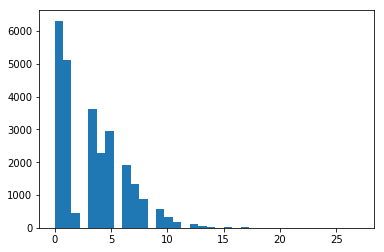

In [19]:
plt.hist(Y.sum(axis=1),bins=36);

In [20]:
list(df[df['message'].str.contains('child')]['message'])

['My house is destroyed in Carrefour. My house is destroyed in Port-au-Prince. The money that the government gave me is lost. My children die, but I am not hurt. Please if you can help me protect the house. ...',
 'S. O. S. Come to our rescue regarding water, food and medical attention and perticularly tents for us to sleep well with the small children',
 'they closed the bathroom and shower at the TNH, so we can no longer do our physical needs. .. . there is some children that poop on themselve because. .. Note : Message cutoff, need to look at other. .. . Sebastien Cournoyer',
 "Please help us so that hunger doesn't kill the children",
 'Things are so difficult for me and my child. Thanks',
 'Mother has 4 children and 3 other children from a sister who died and, 1 child from another brother who died and, i1 other child from the brother of his husband who died. In total 9 children are under her responsibility. .. Note : Track by phone. ..',
 "3 children my house was destroyed with eve

### 2. Write a tokenization function to process your text data

def tokenize(text):
    # Normalize text
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    
    stop_words = stopwords.words("english")
    
    #tokenize
    words = word_tokenize (text)
    
    #stemming
    stemmed = [PorterStemmer().stem(w) for w in words]
    
    #lemmatizing
    words_lemmed = [WordNetLemmatizer().lemmatize(w) for w in stemmed if w not in stop_words]
   
    return words_lemmed

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [17]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
#        ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier(), n_jobs = 35))
        ('clf', MultiOutputClassifier(XGBClassifier()))
        ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state = 42)

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [19]:
#x_test_vect = vectorizer.transform(['we are more than 50 people sleeping in the street please help us find food and tent'])
#d_test = xgb.DMatrix(x_test_vect)
#print(model.predict(d_test))
#list(y_test.columns)


In [ ]:
count= 0
for col in y_test.columns:
    print(col, classification_report(
        y_test[col].values,
        y_pred[:,count]))
    count += 1

In [ ]:
print(classification_report(y_test,y_pred,target_names=list(y_test.columns)))

In [ ]:
count = 0
for col in y_train.columns:
    acc = accuracy_score(y_test[col],y_pred[:,count])
    f1 = f1_score(y_test[col],y_pred[:,count],average='micro')
    prec = precision_score(y_test[col],y_pred[:,count],average='micro')
    recall = recall_score(y_test[col],y_pred[:,count],average='micro')
    print('{0:.3f}, {0:.3f},  {0:.3f}, {0:.3f}    '.format(acc,f1),col)
    count += 1

In [ ]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(f1_score(y_test,y_pred,average='weighted'))
print(f1_score(y_test,y_pred,average='samples'))

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
import time

start = time.time()

parameters = {'clf__estimator__n_estimators': [50, 100],
              'clf__estimator__min_samples_split': [2, 3, 4],
              'clf__estimator__criterion': ['entropy', 'gini']
              }
scorer = make_scorer(f1_score, average='micro')
grid = GridSearchCV(pipeline, param_grid=parameters, scoring=scorer, cv=3, verbose=2)
grid.fit(X_train,y_train)
y_pred_test=grid.predict(X_test)

best_pipeline = cv.best_estimator_

end = time.time()

print('time:',end-start)

In [ ]:
# cv.fit(X_train, y_train)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
better_pipeline = Pipeline([
        ('features', FeatureUnion ([
            
            ('text_pipeline', Pipeline ([
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('tfidf', TfidfTransformer())
                                        ])),      
             ('starting_verb', StartingVerbExtractor ())   
                                    ])),        
        
        ('clf', MultiOutputClassifier(XGBClassifier(), n_jobs=-1))
        ])

# train SVM classifier
# better_pipeline.fit(X_train, y_train)

In [21]:
final_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer(tokenizer=tokenize)),
        ("classifier", MultiOutputClassifier(AdaBoostClassifier(DecisionTreeClassifier()))),
    ]
)

In [22]:
final_pipeline.fit(X, Y)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...er='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=1))])

In [23]:
y_pred = final_pipeline.predict(X)

In [107]:
pred = final_pipeline.predict(['From disaster area to disaster area I hope the people in #Haiti get the food and services they need. Help @RedCrossSELA - http://tr.im/Kho4'])
for item, itm in list(zip(pred[0],Y.columns)):     
    if item == 1:
        print(itm)

related
request
aid_related
food


In [87]:
best_pipeline = pickle.load(open('fair_model__ada.pkl', 'rb'))

In [104]:
pred = best_pipeline.predict(['From disaster area to disaster area I hope the people in #Haiti get the food and services they need. Help @RedCrossSELA - http://tr.im/Kho4'])
for item, itm in list(zip(pred[0],Y.columns)):     
    if item == 1:
        print(itm)

related
aid_related
shelter
floods


In [109]:
!pip freeze

altair==1.2.1
asn1crypto==0.22.0
atari-py==0.1.7
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.6
av==0.3.3
awscli==1.16.17
backcall==0.1.0
backports.functools-lru-cache==1.4
backports.weakref==1.0rc1
beautifulsoup4==4.6.0
bleach==1.5.0
blinker==1.4
blis==0.4.1
bokeh==0.12.13
boto==2.48.0
boto3==1.9.7
botocore==1.12.7
Box2D==2.3.2
Box2D-kengz==2.3.3
bresenham==0.2
bz2file==0.98
cassandra-driver==3.11.0
catalogue==1.0.0
certifi==2019.11.28
cffi==1.11.2
chardet==3.0.4
click==6.7
cloudpickle==0.2.2
colorama==0.3.9
colour==0.1.5
conda==4.6.14
cryptography==2.1.4
cycler==0.10.0
cymem==2.0.3
Cython==0.29.7
cytoolz==0.9.0.1
dask==0.16.1
decorator==4.0.11
defusedxml==0.5.0
dill==0.2.7.1
docutils==0.14
dronekit==2.9.2
entrypoints==0.2.3
et-xmlfile==1.0.1
eventlet==0.22.0
fastcache==1.0.2
Flask==0.12.2
Flask-SocketIO==2.9.2
future==0.16.0
gensim==3.4.0
glfw==1.8.0
greenlet==0.4.12
gym==0.9.6
h5py==2.7.1
heapdict==1.0.0
html2text==2018.1.9
html5lib==0.9999999
idna==2.6
imageio==2.1.2
importlib-

### 9. Export your model as a pickle file

In [119]:
pickle.dump(final_pipeline, open('fair_model__ada_02.pkl', 'wb'))
from sklearn.externals import joblib
joblib.dump(final_pipeline, 'fair_model__ada_02.sav')

['fair_model__ada_02.sav']

In [118]:
final_pipeline.steps[1][1]

MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=1)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [231]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # <3
from sklearn.model_selection import train_test_split
import gc
########################################################################
# load data from database
sql_engine = create_engine('sqlite:///DisasterResponse.db',echo=False)

#had to have this line otherwise froze
connection = sql_engine.raw_connection()  
table_name = str(sql_engine.table_names()[0])
print(sql_engine.table_names())
df = pd.read_sql("SELECT * FROM '{}'".format(table_name),con=connection)
col = list(set(df.columns)-set(df[['id','message','original','genre']]))
display(len(col))
df = df[(df.related!=2) & (df[col].sum(axis=1)!=0)]

train_text = df['message']  #remove original
train_label = df.drop(columns=['id','message','original','genre'])
X_train, X_test, y_train, y_test = train_test_split(
        train_text, train_label, test_size=0.25, random_state=42)
class_names = list(Y.columns)
X_test = X_test.reset_index()
########################################################################
print("TFIDF")
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    norm='l2',
    min_df=0,
    smooth_idf=False)
# train_word_features =word_vectorizer.fit_transform(X_train)
# test_word_features = word_vectorizer.transform(X_test)

char_vectorizer = TfidfVectorizer(
    analyzer='char',
    tokeniser=tokenize,
    stop_words='english',
    ngram_range=(3, 5))

train_features = char_vectorizer.fit_transform(X_train)
test_features = char_vectorizer.transform(X_test['message'])

d_test = xgb.DMatrix(test_features)
gc.collect()

print("Modeling")
cv_scores = []
xgb_preds = []
submission = pd.DataFrame.from_dict({'id': X_test['index']})
print(submission.shape)
for class_name in class_names:
    train_target = pd.DataFrame(y_train[class_name])
    # Split out a validation set
    X_train_1, X_valid, y_train_1, y_valid = train_test_split(train_features, train_target, test_size=0.25, random_state=42)

    xgb_params = {'eta': 0.3, 
              'max_depth': 5, 
              'subsample': 0.8, 
              'colsample_bytree': 0.8, 
              'objective': 'binary:logistic', 
              'eval_metric': 'error', 
              'seed': 23
             }

    d_train = xgb.DMatrix(X_train_1, y_train_1)
    d_valid = xgb.DMatrix(X_valid, y_valid)

    watchlist = [(d_valid, 'valid')]
    model = xgb.train(xgb_params, d_train, 200, watchlist, verbose_eval=False, early_stopping_rounds=30)
    print("class Name: {}".format(class_name))
    print(model.attributes()['best_msg'])
    cv_scores.append(float(model.attributes()['best_score']))
    submission[class_name] = model.predict(d_test)
    # del X_train, X_valid, y_train, y_valid
    gc.collect()
print('Total CV score is {}'.format(np.mean(cv_scores)))
submission.to_csv('submission.csv', index=False)

['data']


36

TFIDF
Modeling
(4977, 1)
class Name: related
[0]	valid-error:0.00000
class Name: request
[14]	valid-error:0.11787
class Name: offer
[3]	valid-error:0.00536
class Name: aid_related
[63]	valid-error:0.26788
class Name: medical_help
[23]	valid-error:0.08760
class Name: medical_products
[52]	valid-error:0.04983
class Name: search_and_rescue
[3]	valid-error:0.03215
class Name: security
[9]	valid-error:0.02813
class Name: military
[24]	valid-error:0.03616
class Name: child_alone
[0]	valid-error:0.00000
class Name: water
[16]	valid-error:0.04206
class Name: food
[9]	valid-error:0.04983
class Name: shelter
[78]	valid-error:0.06402
class Name: clothing
[3]	valid-error:0.01045
class Name: money
[1]	valid-error:0.02840
class Name: missing_people
[6]	valid-error:0.01741
class Name: refugees
[45]	valid-error:0.04259
class Name: death
[12]	valid-error:0.04367
class Name: other_aid
[8]	valid-error:0.17653
class Name: infrastructure_related
[3]	valid-error:0.07715
class Name: transport
[60]	valid-erro

In [232]:
pickle.dump(model, open('fair_model__xgb.pkl', 'wb'))

In [1]:
x_name = final_pipeline.named_steps['tfidf'].get_feature_names()

for j, col in enumerate(category_names):

    x_imp = best_pipeline.named_steps['clf_ada'].estimators_[j].feature_importances_
    value_max = x_imp.max()/2.0

    for i,value in enumerate(x_imp):
        if(value>value_max):
            #print(col,'{0:.3f}'.format(value), x_name[i])
            col_name.append(col)
            imp_value.append(value)
            imp_word.append(x_name[i])


col_name = np.array(col_name).reshape(-1,1)
imp_value = np.array(imp_value).reshape(-1,1)
imp_word = np.array(imp_word).reshape(-1,1)


imp_array = np.concatenate((col_name, imp_value, imp_word), axis=1)

df_imp = pd.DataFrame(imp_array,columns=['category_name','importance_value','important_word'])   

df_imp.importance_value = pd.to_numeric(df_imp.importance_value, downcast='float')

NameError: name 'pipeline' is not defined

In [29]:
# individual pipelines minus the estimator step: 
bow_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer(tokenizer=tokenize)),
    ]
)
manual_pipeline = Pipeline(
    steps=[
        ("dict_vect", DictVectorizer()),
    ]
)
combined_features = FeatureUnion(
    transformer_list=[
        ("bow", bow_pipeline),
    ]
)

In [144]:
pred = final_pipeline.predict(X_test)
for i in range(1,10):
    lst = []
    for item, itm in (zip(pred[i],list(y_test.columns))):  

        if item == 1:
            lst.append([item, itm])
    print(X_test.iloc[i])
    print(lst)

is there possibility to have a natural catastrophy this week 
[[1, 'related'], [1, 'weather_related']]
He was later reunited with his wife, who survived by climbing a tamarind tree.
[[1, 'related'], [1, 'aid_related']]
While tailored to each family's particular needs, each kit typically includes cooking pots, a charcoal stove, dishes and utensils, blankets, sleeping mats, soap, a water container, a bucket, a basin, plastic sheeting, mosquito nets, a water filter and basic foodstuffs (rice, beans, maize, sugar, salt, cooking oil) and in some cases even a pair of goats.
[[1, 'related'], [1, 'aid_related'], [1, 'medical_products'], [1, 'water'], [1, 'food'], [1, 'shelter']]
Now, telecom services at Bhuj, Anjar & Gandhidham.
[[1, 'related']]
water/ faucet line broken in Turjo (area of Haiti). a tractor (heavy equipment of some sort) broke the water lines 
[[1, 'related'], [1, 'aid_related'], [1, 'water']]
He says it's now obvious the scale of the emergency is a real catastrophe with global

In [73]:
best_pipeline = pickle.load(open('fair_model__rf.pkl', 'rb'))

In [145]:
pred = best_pipeline.predict(X_test)
for i in range(1,10):
    lst = []
    for item, itm in (zip(pred[i],list(y_test.columns))):  

        if item == 1:
            lst.append([item, itm])
    print(X_test.iloc[i])
    print(lst)

is there possibility to have a natural catastrophy this week 
[[1.0, 'related']]
He was later reunited with his wife, who survived by climbing a tamarind tree.
[[1.0, 'related']]
While tailored to each family's particular needs, each kit typically includes cooking pots, a charcoal stove, dishes and utensils, blankets, sleeping mats, soap, a water container, a bucket, a basin, plastic sheeting, mosquito nets, a water filter and basic foodstuffs (rice, beans, maize, sugar, salt, cooking oil) and in some cases even a pair of goats.
[[1.0, 'related'], [1.0, 'aid_related'], [1.0, 'water']]
Now, telecom services at Bhuj, Anjar & Gandhidham.
[[1.0, 'related']]
water/ faucet line broken in Turjo (area of Haiti). a tractor (heavy equipment of some sort) broke the water lines 
[[1.0, 'related']]
He says it's now obvious the scale of the emergency is a real catastrophe with global implications and enourmous economic repercussions.
[[1.0, 'related']]
In Meulaboh we are currently providing water an

Haiti in 2010, an earthquake in Chile in 2010, floods in Pakistan in 2010, super-storm Sandy in the U.S.A. in 2012

In [146]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from skimage.io import imread
import random
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 149.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

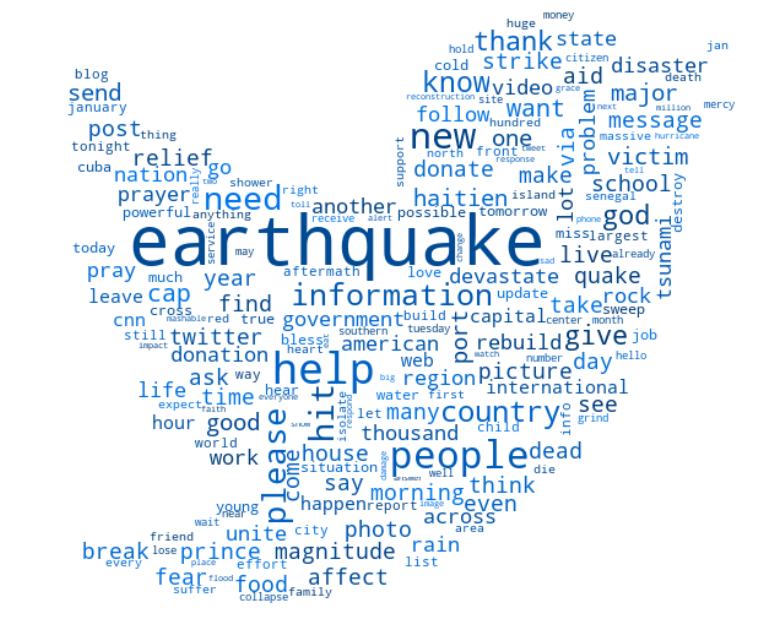

In [150]:
haiti = X[X.str.lower().str.contains('haiti')]
haiti = haiti.apply(lambda x : tokenize(x))
haiti['words'] = haiti.apply(lambda x: ' '.join(map(str, x)))
logomask = imread('twitter_mask.png')
stopwords_wordcloud = set(STOPWORDS)
stopwords_wordcloud.update(["haiti", "now", "wine", "haitian", "flavors"])

wordcloud = WordCloud(collocations = False, stopwords=stopwords_wordcloud, background_color='white', mask=logomask)\
.generate(' '.join(str(v) for v in haiti['words']))
plt.figure(figsize = (15,11))
#plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

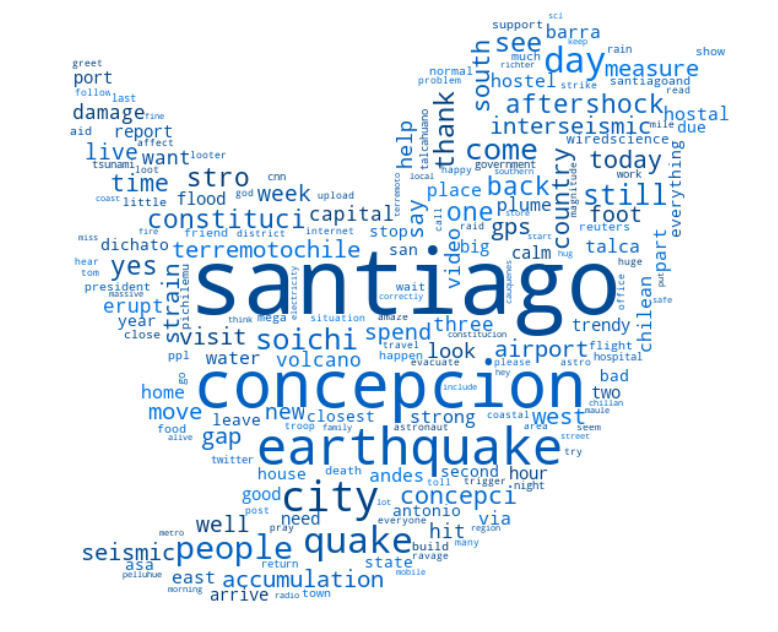

In [151]:
chile = X[X.str.lower().str.contains('chile')]
chile = chile.apply(lambda x : tokenize(x))
chile['words'] = chile.apply(lambda x: ' '.join(map(str, x)))
logomask = imread('twitter_mask.png')
stopwords_wordcloud = set(STOPWORDS)
stopwords_wordcloud.update(["haiti", "chile", "wine", "flavor", "flavors"])

wordcloud = WordCloud(collocations = False, stopwords=stopwords_wordcloud, background_color='white', mask=logomask)\
.generate(' '.join(str(v) for v in chile['words']))
plt.figure(figsize = (15,11))
#plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

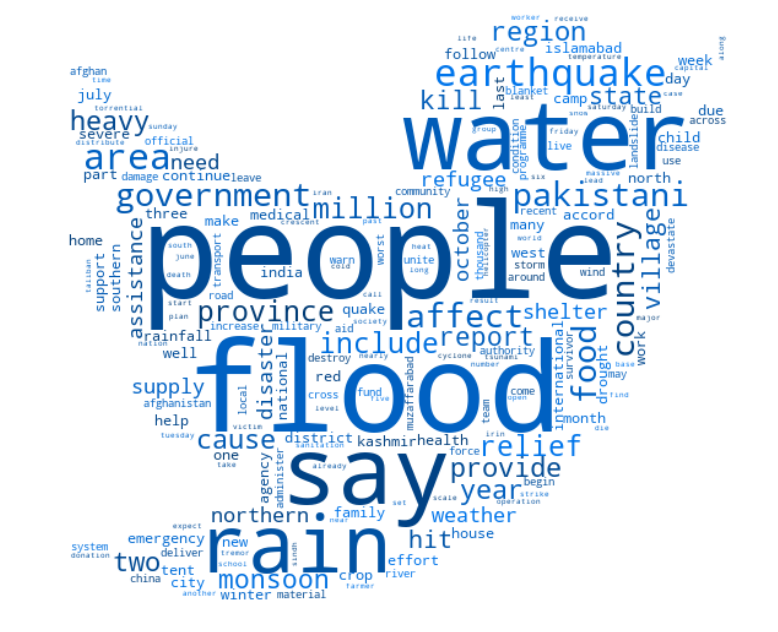

In [152]:
pakistan = X[X.str.lower().str.contains('pakistan')]
pakistan = pakistan.apply(lambda x : tokenize(x))
pakistan['words'] = pakistan.apply(lambda x: ' '.join(map(str, x)))
logomask = imread('twitter_mask.png')
stopwords_wordcloud = set(STOPWORDS)
stopwords_wordcloud.update(["haiti", "chile", "pakistan", "flavor", "flavors"])

wordcloud = WordCloud(collocations = False, stopwords=stopwords_wordcloud, background_color='white', mask=logomask)\
.generate(' '.join(str(v) for v in pakistan['words']))
plt.figure(figsize = (15,11))
#plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

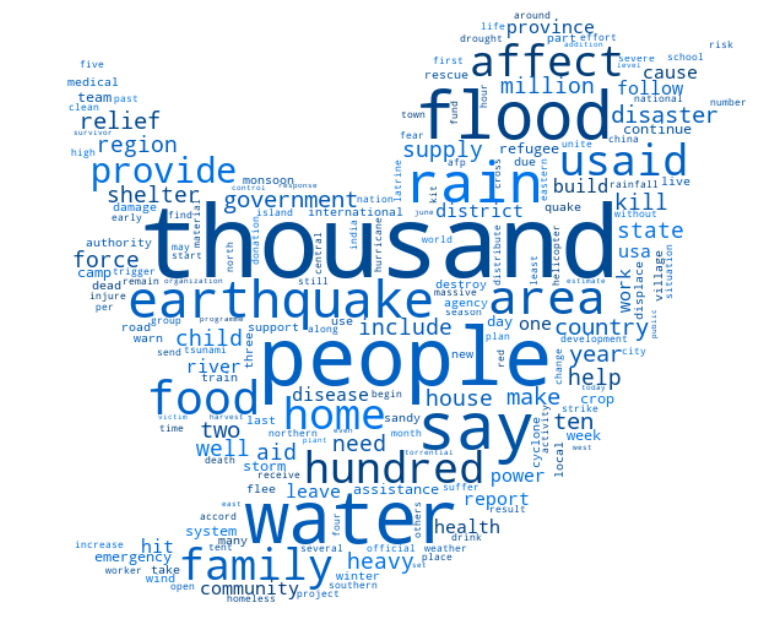

In [207]:
usa = X[X.str.lower().str.contains('usa')]
usa = usa.apply(lambda x : tokenize(x))
usa['words'] = usa.apply(lambda x: ' '.join(map(str, x)))
logomask = imread('twitter_mask.png')
stopwords_wordcloud = set(STOPWORDS)
stopwords_wordcloud.update(["haiti", "chile", "pakistan", "flavor", "flavors"])

wordcloud = WordCloud(collocations = False, stopwords=stopwords_wordcloud, background_color='white', mask=twitter_mask)\
.generate(' '.join(str(v) for v in usa['words']))
plt.figure(figsize = (15,11))
#plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("usa.png")

In [179]:
haiti['words'].apply(pd.Series.value_counts).fillna(0)

,weather update cold front cuba could pas haiti,say west side haiti rest country today tonight,ask general prayer country haiti,transfert house someone abroad send money haiti,help need fond parisien idea haitian tell,cold front find cuba morning could cross haiti tomorrow isolate rain shower expect region tonight,weather forcast cold front cuba could pas haiti night,cold front cuba morning could cross haiti tomorrow isolate rain shower expect region,carrefour street near edh electricity haiti help please,want people know people port prince come cap haitian food eat cap haitien north port prince,...,one army officer station haiti earthquake relief operation naturally make comparison,house completely bury loess hillside thailand school base programme establish teach disaster preparedness child sri lanka thousand emergency responder train indonesia radio network set early warn system mangrove plant project introduce protect coastal community sea reduce impact coastal flood year old girl report miss neighbour cao bang province follow flash flood meet office say city record rainfall till friday fifth highest decade lahaul spiti kinnaur chamba district trigger avalanche many place cut many village observation team member arif cahyo say sinabung tectonic quake show large volume magma present indicate volcano would continue erupt long time cyclone eline gloria kill people river burst bank flood home small farm trigger mudslide local authority provide date piece heavy equipment operator two crew clean operation banda aceh support undp two ferocious storm march april gale force wind dust snow high wind chill add difficulty eventually lead ten human death india meteorological department predict likely duststorm thunderstorm activity northwest india day temperature likely fall next two three day since creation mechanism activate disaster europe like forest fire portugal flood balkan explosion naval base cyprus well worldwide include hurricane katrina deepwater horizon rig explosion earthquake haiti japan famine early warn system few somalia estimate loss crop traditional underground granary due flood rain water seepage tone approximately million people affect past week heavy torrential monsoon rain flood block district state west bengal rahim say pakistani government highly appreciate goodwill china say donation first come abroad since pakistan hit continuous torrential rain heavy snowfall past two week flood trigger monsoon rain affect million people displace million accord agency hour friday january series powerful earthquake strike gujarat state western india peak massive richter scale tremor felt across several state well delhi mumbai bombay neighbour pakistan worst natural disaster myanmar decade hour storm pack wind mile per hour geological survey institute governmental agency within ministry energy mine deal various element geological survey exploration second season crop progress well owe good soil moisture fertility condition mild temperature maize bean late vegetative mature stage suggest prospect second season harvest july zambezia province harvest already start although main harvest expect august accord medium report mudslide trigger torrential rain august kill people injure chittagong city aziz nagar lama thana bandarban district prove one destructive typhoon recent year typhoon ketsana continue path destruction across southeast asia last week eruption spew heat cloud kill people japan chile earthquake cause untold damage past hospital build use base isolation technique absorb shock cause temblor,past month mother nature wreak devastation havoc across world general assembly respond promptly generously mobilize support natural disaster haiti pakistan region world demonstrate relevance continue,minustah peacekeeper deploy major town assist haitian police thus could escort convoy guard distribution site,listen cargo container carry truck satellite van prefabricate build material leave port prince early july route mali support n

In [200]:
twitter_mask = np.array(Image.open("twitter_mask.png"))

In [201]:
np.where(twitter_mask==0, 255, twitter_mask) 

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [203]:
np.where(twitter_mask != 255)

(array([  0,   0,   0, ..., 487, 487, 487]),
 array([  0,   1,   2, ..., 597, 598, 599]),
 array([3, 3, 3, ..., 3, 3, 3]))

In [ ]:
wc.to_file("img/wine.png")